In [1]:
import beamtime_config_2018
import ROI_Finder_2018
import XRF_dataset_2018

from beamtime_config_2018 import *
from ROI_Finder_2018 import *
from XRF_dataset_2018 import *




2022-03-05 23:09:37.944585: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


## load 2018 XRF data with baseline settings, annotations and artifacts removed

In [2]:
XRF_data = load_XRF_dataset_2018(noise_type = 'none', base_file_path='/data02/AZC/XRF_Data/' )
X=XRF_data['X']
X_bin=XRF_data['X_bin']
X_Cu=XRF_data['X_Cu']
X_Zn=XRF_data['X_Zn']
X_Ca=XRF_data['X_Ca']
X_K=XRF_data['X_K']
X_P=XRF_data['X_P']
X_S=XRF_data['X_S']
X_Fe=XRF_data['X_Fe']
X_Ni=XRF_data['X_Ni']
X_TFY=XRF_data['X_TFY']
principalDf=XRF_data['principalDf']
X_centers=XRF_data['X_centers']
X_xrf_track_files=XRF_data['X_xrf_track_files']


# get the annotated data so remove if not annotated
secondaryDf=principalDf[principalDf['KO_label'] != 'not_annotated' ]
# remove additional artifacts that do not contain 8 pixels
secondaryDf=secondaryDf[secondaryDf['Pixel_count'] >8]

#keep track of the original indices after removing artifacts
secondaryDf['original index'] = secondaryDf.index.to_numpy()
secondaryDf.reset_index(drop=True, inplace=True)

Total extracted cells, features: (554, 14)
Total extracted cell, cell size: (554, 32, 32)


## view the cells

In [3]:
linethresh_val=0.00001
resolution=DEFAULT_RESOLUTION_CELL

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
%matplotlib inline


def viewer(idx):

    fig = plt.figure(figsize=(10, 20))
    fig.suptitle('cell_img'+ '_' + str(idx))

    ax1 = fig.add_subplot(521)
    ax1.set_title('binary'+ '_' + str(idx))
    im1 = ax1.imshow(X_bin[idx].T, interpolation='none')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    scalebar_master = ScaleBar( SCALE_UNIT_FACTOR*resolution, "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax1.add_artist(scalebar_master)
    
    

    ax2 = fig.add_subplot(522)
    ax2.set_title('Cu')
    im2 = ax2.imshow(X_Cu[idx].T, interpolation='none', vmax=0.003087)
#     im2 = ax2.imshow(X_Cu[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical');


    ax3 = fig.add_subplot(523)
    ax3.set_title('Zn')
    im3 = ax3.imshow(X_Zn[idx].T, interpolation='none', vmax=0.00318)
#     im3 = ax3.imshow(X_Zn[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical');

    ax4 = fig.add_subplot(524)
    ax4.set_title('Ca')
    im4 = ax4.imshow(X_Ca[idx].T, interpolation='none', vmax=0.00174)
#     im4 = ax4.imshow(X_Ca[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val) )
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im4, cax=cax, orientation='vertical');


    ax5 = fig.add_subplot(525)
    ax5.set_title('K')
    im5 = ax5.imshow(X_K[idx].T, interpolation='none',vmax=0.000584)
#     im5 = ax5.imshow(X_K[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im5, cax=cax, orientation='vertical');

    ax6 = fig.add_subplot(526)
    ax6.set_title('P')
    im6 = ax6.imshow(X_P[idx].T, interpolation='none', vmax=0.000164)
#     im6 = ax6.imshow(X_P[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax6)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical');

    ax7 = fig.add_subplot(527)
    ax7.set_title('S')
    im7 = ax7.imshow(X_S[idx].T, interpolation='none', vmax=0.000122)
#     im7 = ax7.imshow(X_S[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax7)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im7, cax=cax, orientation='vertical');

    ax8 = fig.add_subplot(528)
    ax8.set_title('Ni')
    im8 = ax8.imshow(X_Ni[idx].T, interpolation='none', vmax=0.000093)
#     im8 = ax8.imshow(X_Ni[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax8)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im8, cax=cax, orientation='vertical');

    ax9 = fig.add_subplot(529)
    ax9.set_title('Fe')
    im9 = ax9.imshow(X_Fe[idx].T, interpolation='none', vmax=0.000139)
#     im9 = ax9.imshow(X_Fe[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax9)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im9, cax=cax, orientation='vertical');

    ax10 = fig.add_subplot(5,2,10)
    ax10.set_title('TFY')
    im10 = ax10.imshow(X_TFY[idx].T, interpolation='none', vmax=0.029495)
#     im10 = ax10.imshow(X_TFY[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = 500*linethresh_val))
    divider = make_axes_locatable(ax10)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im10, cax=cax, orientation='vertical');


    

interactive_plot = interactive(viewer, idx=(0, len(X_bin)-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=276, description='idx', max=553), Output()), _dom_classes=('widget-inter…

## view cell in main image by selecting same index and choosing the desired channel in the following code block


In [4]:
selected_elm_channel = 'Cu'

%matplotlib inline

def viewer(idx):
    
    x = XRF_image(xrf_filename = X_xrf_track_files[idx],
             BASE_PATCH_WIDTH=32, verbosity=False)
    x.load_xrf_data(hdf5_string='exchange_4')
    
    if selected_elm_channel == 'Cu':
        d_XRF=x.d_Cu

    if selected_elm_channel == 'Zn':
        d_XRF=x.d_Zn

    if selected_elm_channel == 'Ca':
        d_XRF=x.d_Ca

    if selected_elm_channel == 'K':
        d_XRF=x.d_K

    if selected_elm_channel == 'P':
        d_XRF=dx._P

    if selected_elm_channel == 'S':
        d_XRF=x.d_S

    if selected_elm_channel == 'Fe':
        d_XRF=x.d_Fe

    if selected_elm_channel == 'Ni':
        d_XRF=x.d_Ni

    if selected_elm_channel == 'TFY':
        d_XRF=x.d_TFY

    
    
    fig, ax = plt.subplots(dpi=150)
    
    img=ax.imshow(d_XRF.T)
    ax.set_title('Selected Channel: ' + selected_elm_channel)
    fig.colorbar(img, orientation='vertical')
    
    #16 is the halfwidth of the images
    # we get centers from the patches2d data structure, but the bounding box requires corner points
    
    cell_bbox = patches.Rectangle((X_centers[idx][0]-16, X_centers[idx][1]-16), 32, 32, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(cell_bbox)


    # OR PLOT cross-hair to mark location in main image
    ax.plot(X_centers[idx][0], X_centers[idx][1], 'w+', markersize=CROSS_HAIR_SIZE)
    
    

interactive_plot = interactive(viewer, idx=(0, len(X_bin)-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=276, description='idx', max=553), Output()), _dom_classes=('widget-inter…

## Construct the feature array after artifact removal and y variable with 0 and 1

In [5]:
mod_X = np.asarray([
    secondaryDf['area'],secondaryDf['eccentricity'],secondaryDf['equivalent_diameter'],
    secondaryDf['major_axis_length'],secondaryDf['minor_axis_length'],secondaryDf['perimeter'],
    secondaryDf['K'],secondaryDf['P'],secondaryDf['Ni'],secondaryDf['Zn'],secondaryDf['Fe'],
    secondaryDf['Cu'],secondaryDf['BFY']
               ]).T

print('Cells, features', mod_X.shape)

mod_X = np.asarray([
    secondaryDf['area'],secondaryDf['eccentricity'],secondaryDf['equivalent_diameter'],
    secondaryDf['major_axis_length'],secondaryDf['minor_axis_length'],secondaryDf['perimeter'],
    secondaryDf['K'],secondaryDf['P'],secondaryDf['Ni'],secondaryDf['Zn'],secondaryDf['Fe'],
    secondaryDf['Cu'],secondaryDf['BFY']
               ]).T

print('Cells, features', mod_X.shape)

labels = [0] * mod_X.shape[0]

True_list = secondaryDf.loc[
    (secondaryDf['KO_label'] == 'live')
   ].index.tolist()

print('From heuristics, live cell count: ', len(True_list) )

for idx in True_list:
    labels[idx]=1
    
secondaryDf['y'] = labels

Cells, features (303, 13)
Cells, features (303, 13)
From heuristics, live cell count:  85


## concatenate all channels and use the following code

In [6]:
principalDf

,Pixel_count,area,eccentricity,equivalent_diameter,major_axis_length,minor_axis_length,perimeter,K,P,Ni,...,Fe,Cu,BFY,KO_label,K_obs_labels,Ni_obs_labels,Fe_obs_labels,Cu_obs_labels,Ca_obs_labels,Zn_obs_labels
0,5,0.3125,0.000000,0.630783,0.632456,0.632456,1.414214,0.000029,0.000030,0.000029,...,0.000071,0.001002,0.015246,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated
1,5,0.3125,0.000000,0.630783,0.632456,0.632456,1.414214,0.000029,0.000030,0.000043,...,0.000062,0.000768,0.015790,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated
2,5,0.3125,0.000000,0.630783,0.632456,0.632456,1.414214,0.000030,0.000045,0.000043,...,0.000095,0.001093,0.018312,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated
3,21,1.3125,0.846038,1.292721,1.764861,0.940886,3.828427,0.000045,0.000083,0.000058,...,0.000059,0.001371,0.016610,dead,low,high,high,high,high,high
4,17,1.0625,0.945978,1.163107,2.102629,0.681738,2.267767,0.000045,0.000041,0.000055,...,0.000076,0.001019,0.017674,dead,low,high,high,mid,high,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,25,1.5625,0.941817,1.410474,2.474690,0.831810,5.035534,0.000437,0.000122,0.000056,...,0.000095,0.000059,0.005291,live,high,low,low,low,low,low
550,66,4.1250,0.780748,2.291749,3.971010,2.481270,10.321068,0.000446,0.000147,0.000066,...,0.000125,0.000099,0.005216,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated
551,11,0.6875,0.819334,0.935603,1.241999,0.712058,2.267767,0.000449,0.000102,0.000034,...,0.000068,0.000064,0.004908,live,high,low,low,low,low,low
552,5,0.3125,0.000000,0.630783,0.632456,0.632456,1.414214,0.000313,0.000101,0.000029,...,0.000116,0.000031,0.004815,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated,not_annotated


In [7]:
# concatenate all channels

Full_X = np.concatenate((np.expand_dims(X_bin,axis=-1),np.expand_dims(X_Cu,axis=-1),np.expand_dims(X_Zn,axis=-1),
                         np.expand_dims(X_Ca,axis=-1),np.expand_dims(X_K,axis=-1),np.expand_dims(X_P,axis=-1),
                         np.expand_dims(X_S,axis=-1),np.expand_dims(X_Fe,axis=-1),np.expand_dims(X_Ni,axis=-1),
                         np.expand_dims(X_TFY,axis=-1)
                        ), axis=-1)

In [8]:
# # concatenate all channels except binary

# Full_X = np.concatenate((np.expand_dims(X_Cu,axis=-1),np.expand_dims(X_Zn,axis=-1),
#                          np.expand_dims(X_Ca,axis=-1),np.expand_dims(X_K,axis=-1),np.expand_dims(X_P,axis=-1),
#                          np.expand_dims(X_S,axis=-1),np.expand_dims(X_Fe,axis=-1),np.expand_dims(X_Ni,axis=-1),
#                          np.expand_dims(X_TFY,axis=-1)
#                         ), axis=-1)

In [9]:
# # concatenate only Cu, K, Ni channels except binary

# Full_X = np.concatenate((np.expand_dims(X_Cu,axis=-1),
#                          np.expand_dims(X_K,axis=-1),
#                          np.expand_dims(X_Ni,axis=-1)
#                         ), axis=-1)

In [10]:
num_labels = [2] * X.shape[0]
for idx, value in enumerate(principalDf['KO_label'].to_numpy()):
    if value == 'live':
        num_labels[idx]=1
    if value == 'dead':
        num_labels[idx]=0
        
CAE_labels=np.array(num_labels)
# print(CAE_labels)

In [11]:
Full_X.shape

(554, 32, 32, 10)

In [12]:
# remove not annotated via remove rows

In [13]:
import sys
if '../' not in sys.path:
    sys.path.append('../')

import tools.neural_nets.xrf_autoencoders_32_10
from tools.neural_nets.xrf_autoencoders_32_10 import *


In [14]:
#Adding VAE

# INITIALIZERS

BASE_PATCH_WIDTH=32  #Width of the cell (pixels)

latent_dim=8

num_channels = 10

cell_types=3
noise_amplitude=0.000
        
encoder,decoder=autoencoder_3D_deep(latent_dim,num_channels,BASE_PATCH_WIDTH,summary='yes')



2022-03-05 23:09:41.269455: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-05 23:09:42.022840: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 47.45GiB deviceMemoryBandwidth: 625.94GiB/s
2022-03-05 23:09:42.022916: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-03-05 23:09:42.022982: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-05 23:09:42.023015: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-05 23:09:42.023048: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 10,  0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 16, 16, 5, 16 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 8, 8, 3, 32)  13856       conv3d[0][0]                     
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 4, 4, 2, 64)  55360       conv3d_1[0][0]                   
____________________________________________________________________________________________

ValueError: Input 0 of layer conv3d_transpose is incompatible with the layer: : expected min_ndim=5, found ndim=4. Full shape received: (None, 8, 8, 32)

In [ ]:
# vae = Short_VAE(encoder, decoder,weight=1/250,regularization_type='L1',recon_type='bce')
vae =Short_VAE(encoder, decoder,weight=1/2,regularization_type='kl',recon_type='bce')

vae.compile(optimizer='adam')


In [ ]:
img_data=Full_X

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    img_data, CAE_labels, test_size=0.3, random_state=786)

# only expand if it is 1 channel and that position in shape is missing


# img_data = np.expand_dims(img_data, -1).astype("int")
# img_data = np.expand_dims(img_data, -1).astype("float32") / 255

In [15]:
img_data.shape

NameError: name 'img_data' is not defined

In [35]:
vae_ten_channels=vae.fit(img_data, epochs=2000, batch_size=8,verbose=True)  


Epoch 1/2000
70/70 [==============================] - 1s 10ms/step - loss: 9.5336e-04 - reconstruction_loss: 7.1450e-04 - regularization_loss: 1.9261e-04
Epoch 2/2000
70/70 [==============================] - 1s 10ms/step - loss: 8.7619e-04 - reconstruction_loss: 7.0602e-04 - regularization_loss: 1.6950e-04
Epoch 3/2000
70/70 [==============================] - 1s 10ms/step - loss: 7.2757e-04 - reconstruction_loss: 7.4524e-04 - regularization_loss: 1.5876e-04
Epoch 4/2000
70/70 [==============================] - 1s 10ms/step - loss: 7.4668e-04 - reconstruction_loss: 6.8461e-04 - regularization_loss: 1.6817e-04
Epoch 5/2000
70/70 [==============================] - 1s 10ms/step - loss: 8.4619e-04 - reconstruction_loss: 6.9701e-04 - regularization_loss: 4.9561e-04
Epoch 6/2000
70/70 [==============================] - 1s 10ms/step - loss: 9.9350e-04 - reconstruction_loss: 7.3397e-04 - regularization_loss: 7.9944e-04
Epoch 7/2000
70/70 [==============================] - 1s 10ms/step - loss: 0

70/70 [==============================] - 1s 10ms/step - loss: 0.0048 - reconstruction_loss: 0.0028 - regularization_loss: 0.0078
Epoch 56/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0057 - reconstruction_loss: 0.0026 - regularization_loss: 0.0057
Epoch 57/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0046 - reconstruction_loss: 0.0020 - regularization_loss: 0.0052
Epoch 58/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0042 - reconstruction_loss: 0.0017 - regularization_loss: 0.0047
Epoch 59/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0037 - reconstruction_loss: 0.0020 - regularization_loss: 0.0031
Epoch 60/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0029 - reconstruction_loss: 0.0022 - regularization_loss: 0.0013
Epoch 61/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0017 - regularization_loss: 0.0016
Epoch 62/2000

70/70 [==============================] - 1s 9ms/step - loss: 0.0019 - reconstruction_loss: 0.0014 - regularization_loss: 6.4619e-04
Epoch 112/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0017 - reconstruction_loss: 0.0012 - regularization_loss: 6.5806e-04
Epoch 113/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0013 - reconstruction_loss: 0.0012 - regularization_loss: 5.3160e-04
Epoch 114/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0014 - reconstruction_loss: 0.0012 - regularization_loss: 4.6173e-04
Epoch 115/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0015 - reconstruction_loss: 0.0011 - regularization_loss: 4.6675e-04
Epoch 116/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0012 - reconstruction_loss: 0.0011 - regularization_loss: 4.7981e-04
Epoch 117/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0012 - reconstruction_loss: 0.0010 - regularization_los

70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 7.1147e-04 - regularization_loss: 7.4016e-04
Epoch 165/2000
70/70 [==============================] - 1s 10ms/step - loss: 7.5656e-04 - reconstruction_loss: 7.1920e-04 - regularization_loss: 3.0321e-04
Epoch 166/2000
70/70 [==============================] - 1s 10ms/step - loss: 8.3747e-04 - reconstruction_loss: 6.5336e-04 - regularization_loss: 2.7969e-04
Epoch 167/2000
70/70 [==============================] - 1s 10ms/step - loss: 7.1309e-04 - reconstruction_loss: 6.3869e-04 - regularization_loss: 3.5782e-04
Epoch 168/2000
70/70 [==============================] - 1s 10ms/step - loss: 8.3265e-04 - reconstruction_loss: 5.9802e-04 - regularization_loss: 2.8182e-04
Epoch 169/2000
70/70 [==============================] - 1s 10ms/step - loss: 8.6403e-04 - reconstruction_loss: 6.5523e-04 - regularization_loss: 3.2020e-04
Epoch 170/2000
70/70 [==============================] - 1s 10ms/step - loss: 7.5115

70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0015 - regularization_loss: 0.0012
Epoch 218/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0014 - regularization_loss: 8.8477e-04
Epoch 219/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0013 - regularization_loss: 6.9227e-04
Epoch 220/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0012 - regularization_loss: 7.7707e-04
Epoch 221/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0011 - regularization_loss: 6.0438e-04
Epoch 222/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0013 - reconstruction_loss: 0.0011 - regularization_loss: 8.0045e-04
Epoch 223/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 0.0011 - regularization_

70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0010 - regularization_loss: 0.0014
Epoch 272/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0016 - regularization_loss: 0.0015
Epoch 273/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0034 - reconstruction_loss: 0.0019 - regularization_loss: 0.0024
Epoch 274/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0050 - reconstruction_loss: 0.0018 - regularization_loss: 0.0039
Epoch 275/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0012 - regularization_loss: 0.0011
Epoch 276/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0013 - regularization_loss: 0.0011
Epoch 277/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0013 - reconstruction_loss: 0.0010 - regularization_loss: 8.9908e-04
Epo

70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0017 - regularization_loss: 0.0010
Epoch 328/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0016 - regularization_loss: 0.0012
Epoch 329/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0016 - regularization_loss: 0.0013
Epoch 330/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0026 - reconstruction_loss: 0.0019 - regularization_loss: 0.0025
Epoch 331/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0033 - reconstruction_loss: 0.0020 - regularization_loss: 0.0019
Epoch 332/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0026 - reconstruction_loss: 0.0018 - regularization_loss: 0.0015
Epoch 333/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0017 - regularization_loss: 9.4911e-04
Epo

70/70 [==============================] - 1s 10ms/step - loss: 0.0034 - reconstruction_loss: 0.0020 - regularization_loss: 0.0024
Epoch 384/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0032 - reconstruction_loss: 0.0020 - regularization_loss: 0.0023
Epoch 385/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0038 - reconstruction_loss: 0.0020 - regularization_loss: 0.0032
Epoch 386/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0039 - reconstruction_loss: 0.0022 - regularization_loss: 0.0038
Epoch 387/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0042 - reconstruction_loss: 0.0020 - regularization_loss: 0.0032
Epoch 388/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0032 - reconstruction_loss: 0.0020 - regularization_loss: 0.0028
Epoch 389/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0031 - reconstruction_loss: 0.0025 - regularization_loss: 0.0018
Epoch 3

Epoch 440/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0050 - reconstruction_loss: 0.0025 - regularization_loss: 0.0051
Epoch 441/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0054 - reconstruction_loss: 0.0034 - regularization_loss: 0.0048
Epoch 442/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0049 - reconstruction_loss: 0.0028 - regularization_loss: 0.0040
Epoch 443/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0044 - reconstruction_loss: 0.0023 - regularization_loss: 0.0034
Epoch 444/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0032 - reconstruction_loss: 0.0024 - regularization_loss: 0.0030
Epoch 445/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0036 - reconstruction_loss: 0.0023 - regularization_loss: 0.0028
Epoch 446/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0091 - reconstruction_loss: 0.0053 - regularization_loss:

70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 0.0011 - regularization_loss: 8.0163e-04
Epoch 497/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0011 - regularization_loss: 9.1668e-04
Epoch 498/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0010 - regularization_loss: 7.9595e-04
Epoch 499/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0011 - regularization_loss: 7.4631e-04
Epoch 500/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0010 - regularization_loss: 7.6070e-04
Epoch 501/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 0.0010 - regularization_loss: 6.9016e-04
Epoch 502/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 9.8113e-04 - regular

70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0012 - regularization_loss: 0.0010
Epoch 552/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0013 - regularization_loss: 0.0010
Epoch 553/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0011 - regularization_loss: 9.0372e-04
Epoch 554/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0013 - reconstruction_loss: 0.0011 - regularization_loss: 5.9583e-04
Epoch 555/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0011 - regularization_loss: 8.5856e-04
Epoch 556/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0016 - reconstruction_loss: 0.0013 - regularization_loss: 0.0031
Epoch 557/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0094 - reconstruction_loss: 0.0034 - regularization_loss: 0.

70/70 [==============================] - 1s 10ms/step - loss: 0.0027 - reconstruction_loss: 0.0013 - regularization_loss: 0.0024
Epoch 608/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0013 - regularization_loss: 0.0023
Epoch 609/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0012 - regularization_loss: 0.0017
Epoch 610/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0012 - regularization_loss: 0.0015
Epoch 611/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0012 - regularization_loss: 0.0014
Epoch 612/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0012 - regularization_loss: 0.0015
Epoch 613/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0013 - regularization_loss: 0.0013
Epoch 6

70/70 [==============================] - 1s 10ms/step - loss: 0.0034 - reconstruction_loss: 0.0023 - regularization_loss: 0.0020
Epoch 663/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0033 - reconstruction_loss: 0.0021 - regularization_loss: 0.0029
Epoch 664/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0040 - reconstruction_loss: 0.0023 - regularization_loss: 0.0026
Epoch 665/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0034 - reconstruction_loss: 0.0018 - regularization_loss: 0.0022
Epoch 666/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0019 - regularization_loss: 0.0017
Epoch 667/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0029 - reconstruction_loss: 0.0017 - regularization_loss: 0.0032
Epoch 668/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0025 - reconstruction_loss: 0.0016 - regularization_loss: 0.0020
Epoch 6

70/70 [==============================] - 1s 10ms/step - loss: 0.0074 - reconstruction_loss: 0.0042 - regularization_loss: 0.0067
Epoch 719/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0049 - reconstruction_loss: 0.0033 - regularization_loss: 0.0038
Epoch 720/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0043 - reconstruction_loss: 0.0027 - regularization_loss: 0.0035
Epoch 721/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0044 - reconstruction_loss: 0.0027 - regularization_loss: 0.0029
Epoch 722/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0037 - reconstruction_loss: 0.0026 - regularization_loss: 0.0024
Epoch 723/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0041 - reconstruction_loss: 0.0025 - regularization_loss: 0.0024
Epoch 724/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0038 - reconstruction_loss: 0.0023 - regularization_loss: 0.0024
Epoch 7

70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0013 - regularization_loss: 7.7143e-04
Epoch 775/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0015 - regularization_loss: 0.0013
Epoch 776/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0015 - regularization_loss: 0.0018
Epoch 777/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0013 - regularization_loss: 0.0013
Epoch 778/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0014 - regularization_loss: 0.0019
Epoch 779/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0034 - reconstruction_loss: 0.0015 - regularization_loss: 0.0034
Epoch 780/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0028 - reconstruction_loss: 0.0016 - regularization_loss: 0.0023
Epo

70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0018 - regularization_loss: 0.0017
Epoch 830/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0025 - reconstruction_loss: 0.0017 - regularization_loss: 0.0016
Epoch 831/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0016 - regularization_loss: 0.0015
Epoch 832/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0014 - regularization_loss: 0.0014
Epoch 833/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0014 - regularization_loss: 0.0012
Epoch 834/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0013 - regularization_loss: 0.0012
Epoch 835/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0019 - reconstruction_loss: 0.0013 - regularization_loss: 0.0013
Epoch 83

70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 8.2161e-04 - regularization_loss: 7.6599e-04
Epoch 885/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 7.9670e-04 - regularization_loss: 7.0596e-04
Epoch 886/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 7.9981e-04 - regularization_loss: 6.7573e-04
Epoch 887/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 7.9594e-04 - regularization_loss: 6.6829e-04
Epoch 888/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 8.7059e-04 - regularization_loss: 7.9042e-04
Epoch 889/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0012 - regularization_loss: 0.0011
Epoch 890/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.00

70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0016 - regularization_loss: 0.0017
Epoch 940/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0015 - regularization_loss: 0.0013
Epoch 941/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0014 - regularization_loss: 0.0014
Epoch 942/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0014 - regularization_loss: 0.0013
Epoch 943/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0014 - regularization_loss: 0.0012
Epoch 944/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0013 - regularization_loss: 8.9964e-04
Epoch 945/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0012 - regularization_loss: 0.0010
Epo

70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0014 - regularization_loss: 0.0016
Epoch 996/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0014 - regularization_loss: 0.0017
Epoch 997/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0021 - reconstruction_loss: 0.0016 - regularization_loss: 9.6472e-04
Epoch 998/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0012 - regularization_loss: 9.0976e-04
Epoch 999/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0011 - regularization_loss: 0.0022
Epoch 1000/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0028 - reconstruction_loss: 0.0014 - regularization_loss: 0.0029
Epoch 1001/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0028 - reconstruction_loss: 0.0012 - regularization_loss: 0.003

70/70 [==============================] - 1s 10ms/step - loss: 0.0054 - reconstruction_loss: 0.0036 - regularization_loss: 0.0023
Epoch 1052/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0038 - reconstruction_loss: 0.0029 - regularization_loss: 0.0019
Epoch 1053/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0037 - reconstruction_loss: 0.0031 - regularization_loss: 0.0018
Epoch 1054/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0052 - reconstruction_loss: 0.0040 - regularization_loss: 0.0017
Epoch 1055/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0038 - reconstruction_loss: 0.0029 - regularization_loss: 0.0013
Epoch 1056/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0030 - reconstruction_loss: 0.0027 - regularization_loss: 0.0013
Epoch 1057/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0033 - reconstruction_loss: 0.0023 - regularization_loss: 0.0011
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0027 - reconstruction_loss: 0.0019 - regularization_loss: 0.0017
Epoch 1108/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0018 - regularization_loss: 0.0015
Epoch 1109/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0026 - reconstruction_loss: 0.0016 - regularization_loss: 0.0014
Epoch 1110/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0026 - reconstruction_loss: 0.0017 - regularization_loss: 0.0012
Epoch 1111/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0016 - regularization_loss: 0.0017
Epoch 1112/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0026 - reconstruction_loss: 0.0015 - regularization_loss: 0.0013
Epoch 1113/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0027 - reconstruction_loss: 0.0014 - regularization_loss: 0.0014
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0013 - regularization_loss: 0.0013
Epoch 1164/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0013 - regularization_loss: 0.0010
Epoch 1165/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0013 - regularization_loss: 8.8345e-04
Epoch 1166/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0012 - regularization_loss: 8.5580e-04
Epoch 1167/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0011 - regularization_loss: 8.8107e-04
Epoch 1168/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0016 - reconstruction_loss: 0.0011 - regularization_loss: 8.4400e-04
Epoch 1169/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0011 - regularizatio

70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 8.4501e-04 - regularization_loss: 9.5838e-04
Epoch 1219/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0016 - reconstruction_loss: 8.4892e-04 - regularization_loss: 8.9853e-04
Epoch 1220/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 8.2563e-04 - regularization_loss: 9.5023e-04
Epoch 1221/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 8.2476e-04 - regularization_loss: 8.1258e-04
Epoch 1222/2000
70/70 [==============================] - 1s 10ms/step - loss: 9.1596e-04 - reconstruction_loss: 8.2974e-04 - regularization_loss: 7.6364e-04
Epoch 1223/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0010 - reconstruction_loss: 8.8493e-04 - regularization_loss: 8.3272e-04
Epoch 1224/2000
70/70 [==============================] - 1s 10ms/step - loss: 9.7472e-04 - rec

70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0014 - regularization_loss: 0.0011
Epoch 1273/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0014 - regularization_loss: 8.4814e-04
Epoch 1274/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0014 - regularization_loss: 0.0015
Epoch 1275/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0013 - regularization_loss: 0.0011
Epoch 1276/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0013 - regularization_loss: 7.8595e-04
Epoch 1277/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0029 - reconstruction_loss: 0.0017 - regularization_loss: 0.0046
Epoch 1278/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0035 - reconstruction_loss: 0.0021 - regularization_loss: 

70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0013 - regularization_loss: 7.4159e-04
Epoch 1328/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0013 - regularization_loss: 5.8854e-04
Epoch 1329/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0011 - regularization_loss: 7.8912e-04
Epoch 1330/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0016 - regularization_loss: 0.0013
Epoch 1331/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0014 - regularization_loss: 0.0010
Epoch 1332/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0015 - reconstruction_loss: 0.0013 - regularization_loss: 0.0015
Epoch 1333/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0038 - reconstruction_loss: 0.0022 - regularization_lo

70/70 [==============================] - 1s 10ms/step - loss: 8.4495e-04 - reconstruction_loss: 6.5723e-04 - regularization_loss: 3.3637e-04
Epoch 1382/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0013 - reconstruction_loss: 7.2174e-04 - regularization_loss: 7.8229e-04
Epoch 1383/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0012 - reconstruction_loss: 6.8464e-04 - regularization_loss: 6.4072e-04
Epoch 1384/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0011 - regularization_loss: 0.0024
Epoch 1385/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0041 - reconstruction_loss: 0.0027 - regularization_loss: 0.0086
Epoch 1386/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0052 - reconstruction_loss: 0.0026 - regularization_loss: 0.0044
Epoch 1387/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0031 - reconstruction_loss: 0.0019 - r

70/70 [==============================] - 1s 10ms/step - loss: 0.0027 - reconstruction_loss: 0.0018 - regularization_loss: 0.0017
Epoch 1437/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0026 - reconstruction_loss: 0.0018 - regularization_loss: 0.0018
Epoch 1438/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0018 - regularization_loss: 0.0018
Epoch 1439/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0015 - regularization_loss: 0.0019
Epoch 1440/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0015 - regularization_loss: 0.0016
Epoch 1441/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0014 - regularization_loss: 0.0016
Epoch 1442/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0014 - regularization_loss: 0.0016
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 0.0010 - regularization_loss: 0.0011   
Epoch 1492/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0011 - regularization_loss: 0.0022
Epoch 1493/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0013 - regularization_loss: 8.7240e-04
Epoch 1494/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0010 - regularization_loss: 9.6122e-04
Epoch 1495/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 9.2702e-04 - regularization_loss: 9.3435e-04
Epoch 1496/2000
70/70 [==============================] - 1s 10ms/step - loss: 9.2649e-04 - reconstruction_loss: 8.9892e-04 - regularization_loss: 7.6708e-04
Epoch 1497/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 9.4187e

70/70 [==============================] - 1s 10ms/step - loss: 0.0031 - reconstruction_loss: 0.0022 - regularization_loss: 0.0028
Epoch 1547/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0040 - reconstruction_loss: 0.0027 - regularization_loss: 0.0031
Epoch 1548/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0047 - reconstruction_loss: 0.0028 - regularization_loss: 0.0024
Epoch 1549/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0029 - reconstruction_loss: 0.0023 - regularization_loss: 0.0022
Epoch 1550/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0030 - reconstruction_loss: 0.0022 - regularization_loss: 0.0017
Epoch 1551/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0028 - reconstruction_loss: 0.0018 - regularization_loss: 0.0019
Epoch 1552/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0018 - regularization_loss: 0.0019
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0036 - reconstruction_loss: 0.0022 - regularization_loss: 0.0043
Epoch 1603/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0040 - reconstruction_loss: 0.0020 - regularization_loss: 0.0043
Epoch 1604/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0039 - reconstruction_loss: 0.0021 - regularization_loss: 0.0044
Epoch 1605/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0032 - reconstruction_loss: 0.0018 - regularization_loss: 0.0040
Epoch 1606/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0056 - reconstruction_loss: 0.0017 - regularization_loss: 0.0040
Epoch 1607/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0042 - reconstruction_loss: 0.0023 - regularization_loss: 0.0038
Epoch 1608/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0047 - reconstruction_loss: 0.0022 - regularization_loss: 0.0033
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0012 - regularization_loss: 0.0021
Epoch 1659/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0013 - regularization_loss: 0.0016
Epoch 1660/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0012 - regularization_loss: 0.0016
Epoch 1661/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0012 - regularization_loss: 0.0017
Epoch 1662/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0014 - regularization_loss: 0.0014
Epoch 1663/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0012 - regularization_loss: 0.0013
Epoch 1664/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0011 - regularization_loss: 0.0014
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0058 - reconstruction_loss: 0.0030 - regularization_loss: 0.0041
Epoch 1715/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0057 - reconstruction_loss: 0.0039 - regularization_loss: 0.0062
Epoch 1716/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0074 - reconstruction_loss: 0.0054 - regularization_loss: 0.0039
Epoch 1717/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0060 - reconstruction_loss: 0.0045 - regularization_loss: 0.0041
Epoch 1718/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0053 - reconstruction_loss: 0.0041 - regularization_loss: 0.0036
Epoch 1719/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0056 - reconstruction_loss: 0.0037 - regularization_loss: 0.0033
Epoch 1720/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0048 - reconstruction_loss: 0.0032 - regularization_loss: 0.0035
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0016 - reconstruction_loss: 0.0012 - regularization_loss: 0.0011
Epoch 1771/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0019 - reconstruction_loss: 0.0012 - regularization_loss: 0.0013
Epoch 1772/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0012 - regularization_loss: 0.0012
Epoch 1773/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0012 - regularization_loss: 0.0012
Epoch 1774/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0012 - regularization_loss: 0.0013
Epoch 1775/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0017 - reconstruction_loss: 0.0011 - regularization_loss: 0.0013
Epoch 1776/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0012 - regularization_loss: 0.0014
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0014 - regularization_loss: 8.4017e-04
Epoch 1826/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0013 - reconstruction_loss: 0.0011 - regularization_loss: 6.0190e-04
Epoch 1827/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0014 - reconstruction_loss: 0.0011 - regularization_loss: 4.8376e-04
Epoch 1828/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 0.0010 - regularization_loss: 5.4797e-04
Epoch 1829/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0011 - reconstruction_loss: 0.0013 - regularization_loss: 5.1533e-04
Epoch 1830/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0035 - reconstruction_loss: 0.0018 - regularization_loss: 0.0019
Epoch 1831/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0024 - reconstruction_loss: 0.0016 - regulariz

70/70 [==============================] - 1s 10ms/step - loss: 0.0051 - reconstruction_loss: 0.0026 - regularization_loss: 0.0045
Epoch 1882/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0048 - reconstruction_loss: 0.0021 - regularization_loss: 0.0045
Epoch 1883/2000
70/70 [==============================] - 1s 9ms/step - loss: 0.0041 - reconstruction_loss: 0.0022 - regularization_loss: 0.0032
Epoch 1884/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0030 - reconstruction_loss: 0.0020 - regularization_loss: 0.0023
Epoch 1885/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0036 - reconstruction_loss: 0.0021 - regularization_loss: 0.0065
Epoch 1886/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0058 - reconstruction_loss: 0.0028 - regularization_loss: 0.0061
Epoch 1887/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0054 - reconstruction_loss: 0.0026 - regularization_loss: 0.0047
Epo

70/70 [==============================] - 1s 10ms/step - loss: 0.0032 - reconstruction_loss: 0.0026 - regularization_loss: 0.0016
Epoch 1938/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0034 - reconstruction_loss: 0.0026 - regularization_loss: 0.0016
Epoch 1939/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0036 - reconstruction_loss: 0.0026 - regularization_loss: 0.0016
Epoch 1940/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0030 - reconstruction_loss: 0.0027 - regularization_loss: 0.0016
Epoch 1941/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0033 - reconstruction_loss: 0.0026 - regularization_loss: 0.0014
Epoch 1942/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0038 - reconstruction_loss: 0.0026 - regularization_loss: 0.0014
Epoch 1943/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0036 - reconstruction_loss: 0.0025 - regularization_loss: 0.0014
E

70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0013 - regularization_loss: 0.0016
Epoch 1994/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0018 - reconstruction_loss: 0.0014 - regularization_loss: 0.0014
Epoch 1995/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0023 - reconstruction_loss: 0.0013 - regularization_loss: 0.0013
Epoch 1996/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0020 - reconstruction_loss: 0.0014 - regularization_loss: 0.0012
Epoch 1997/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0015 - regularization_loss: 0.0015
Epoch 1998/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0021 - reconstruction_loss: 0.0014 - regularization_loss: 0.0011
Epoch 1999/2000
70/70 [==============================] - 1s 10ms/step - loss: 0.0022 - reconstruction_loss: 0.0014 - regularization_loss: 0.0014
E

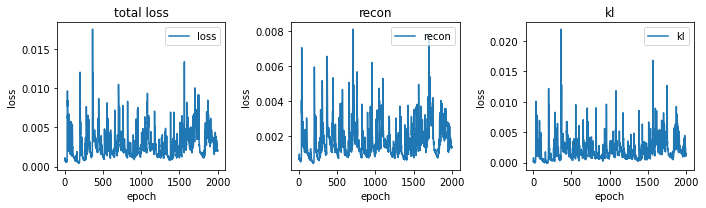

In [36]:
model_history(vae_ten_channels,'kl')

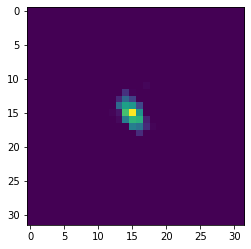

In [37]:
# decoder_output=decoder.predict(encoder.predict(np.expand_dims(combined_data[image_no],0))[2])
image_no=3
decoder_output=decoder.predict(encoder.predict(np.expand_dims(img_data[image_no],0) )[2]).reshape(BASE_PATCH_WIDTH,BASE_PATCH_WIDTH,num_channels)

plt.imshow(decoder_output.T[0])



In [38]:
linethresh_val=0.00001
resolution=DEFAULT_RESOLUTION_CELL

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
%matplotlib inline


def viewer(idx):
    
    decoder_output=decoder.predict(encoder.predict(np.expand_dims(img_data[idx],0) )[2]).reshape(BASE_PATCH_WIDTH,BASE_PATCH_WIDTH,num_channels)
    
    fig = plt.figure(figsize=(10, 20))
    fig.suptitle('cell_img'+ '_' + str(idx))

    ax1 = fig.add_subplot(521)
    ax1.set_title('not available'+ '_' + str(idx))
    im1 = ax1.imshow(decoder_output.T[0], interpolation='none')
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im1, cax=cax, orientation='vertical')
    scalebar_master = ScaleBar( SCALE_UNIT_FACTOR*resolution, "m", color='white', length_fraction=0.10, box_alpha=0.10)
    ax1.add_artist(scalebar_master)
    
    

    ax2 = fig.add_subplot(522)
    ax2.set_title('Cu')
    im2 = ax2.imshow(decoder_output.T[0], interpolation='none')
#     im2 = ax2.imshow(X_Cu[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im2, cax=cax, orientation='vertical');


    ax3 = fig.add_subplot(523)
    ax3.set_title('Zn')
    im3 = ax3.imshow(decoder_output.T[1], interpolation='none')
#     im3 = ax3.imshow(X_Zn[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax3)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im3, cax=cax, orientation='vertical');

    ax4 = fig.add_subplot(524)
    ax4.set_title('Ca')
    im4 = ax4.imshow(decoder_output.T[2], interpolation='none')
#     im4 = ax4.imshow(X_Ca[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val) )
    divider = make_axes_locatable(ax4)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im4, cax=cax, orientation='vertical');


    ax5 = fig.add_subplot(525)
    ax5.set_title('K')
    im5 = ax5.imshow(decoder_output.T[3], interpolation='none')
#     im5 = ax5.imshow(X_K[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax5)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im5, cax=cax, orientation='vertical');

    ax6 = fig.add_subplot(526)
    ax6.set_title('P')
    im6 = ax6.imshow(decoder_output.T[4], interpolation='none')
#     im6 = ax6.imshow(X_P[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax6)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im6, cax=cax, orientation='vertical');

    ax7 = fig.add_subplot(527)
    ax7.set_title('S')
    im7 = ax7.imshow(decoder_output.T[5], interpolation='none')
#     im7 = ax7.imshow(X_S[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax7)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im7, cax=cax, orientation='vertical');

    ax8 = fig.add_subplot(528)
    ax8.set_title('Ni')
    im8 = ax8.imshow(decoder_output.T[6], interpolation='none')
#     im8 = ax8.imshow(X_Ni[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax8)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im8, cax=cax, orientation='vertical');

    ax9 = fig.add_subplot(529)
    ax9.set_title('Fe')
    im9 = ax9.imshow(decoder_output.T[7], interpolation='none')
#     im9 = ax9.imshow(X_Fe[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = linethresh_val))
    divider = make_axes_locatable(ax9)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im9, cax=cax, orientation='vertical');

    ax10 = fig.add_subplot(5,2,10)
    ax10.set_title('TFY')
    im10 = ax10.imshow(decoder_output.T[8], interpolation='none')
#     im10 = ax10.imshow(X_TFY[original_idx].T, interpolation='none', norm = colors.SymLogNorm(linthresh = 500*linethresh_val))
    divider = make_axes_locatable(ax10)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im10, cax=cax, orientation='vertical');


    

interactive_plot = interactive(viewer, idx=(0, len(X_bin)-1))
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(IntSlider(value=276, description='idx', max=553), Output()), _dom_classes=('widget-inter…

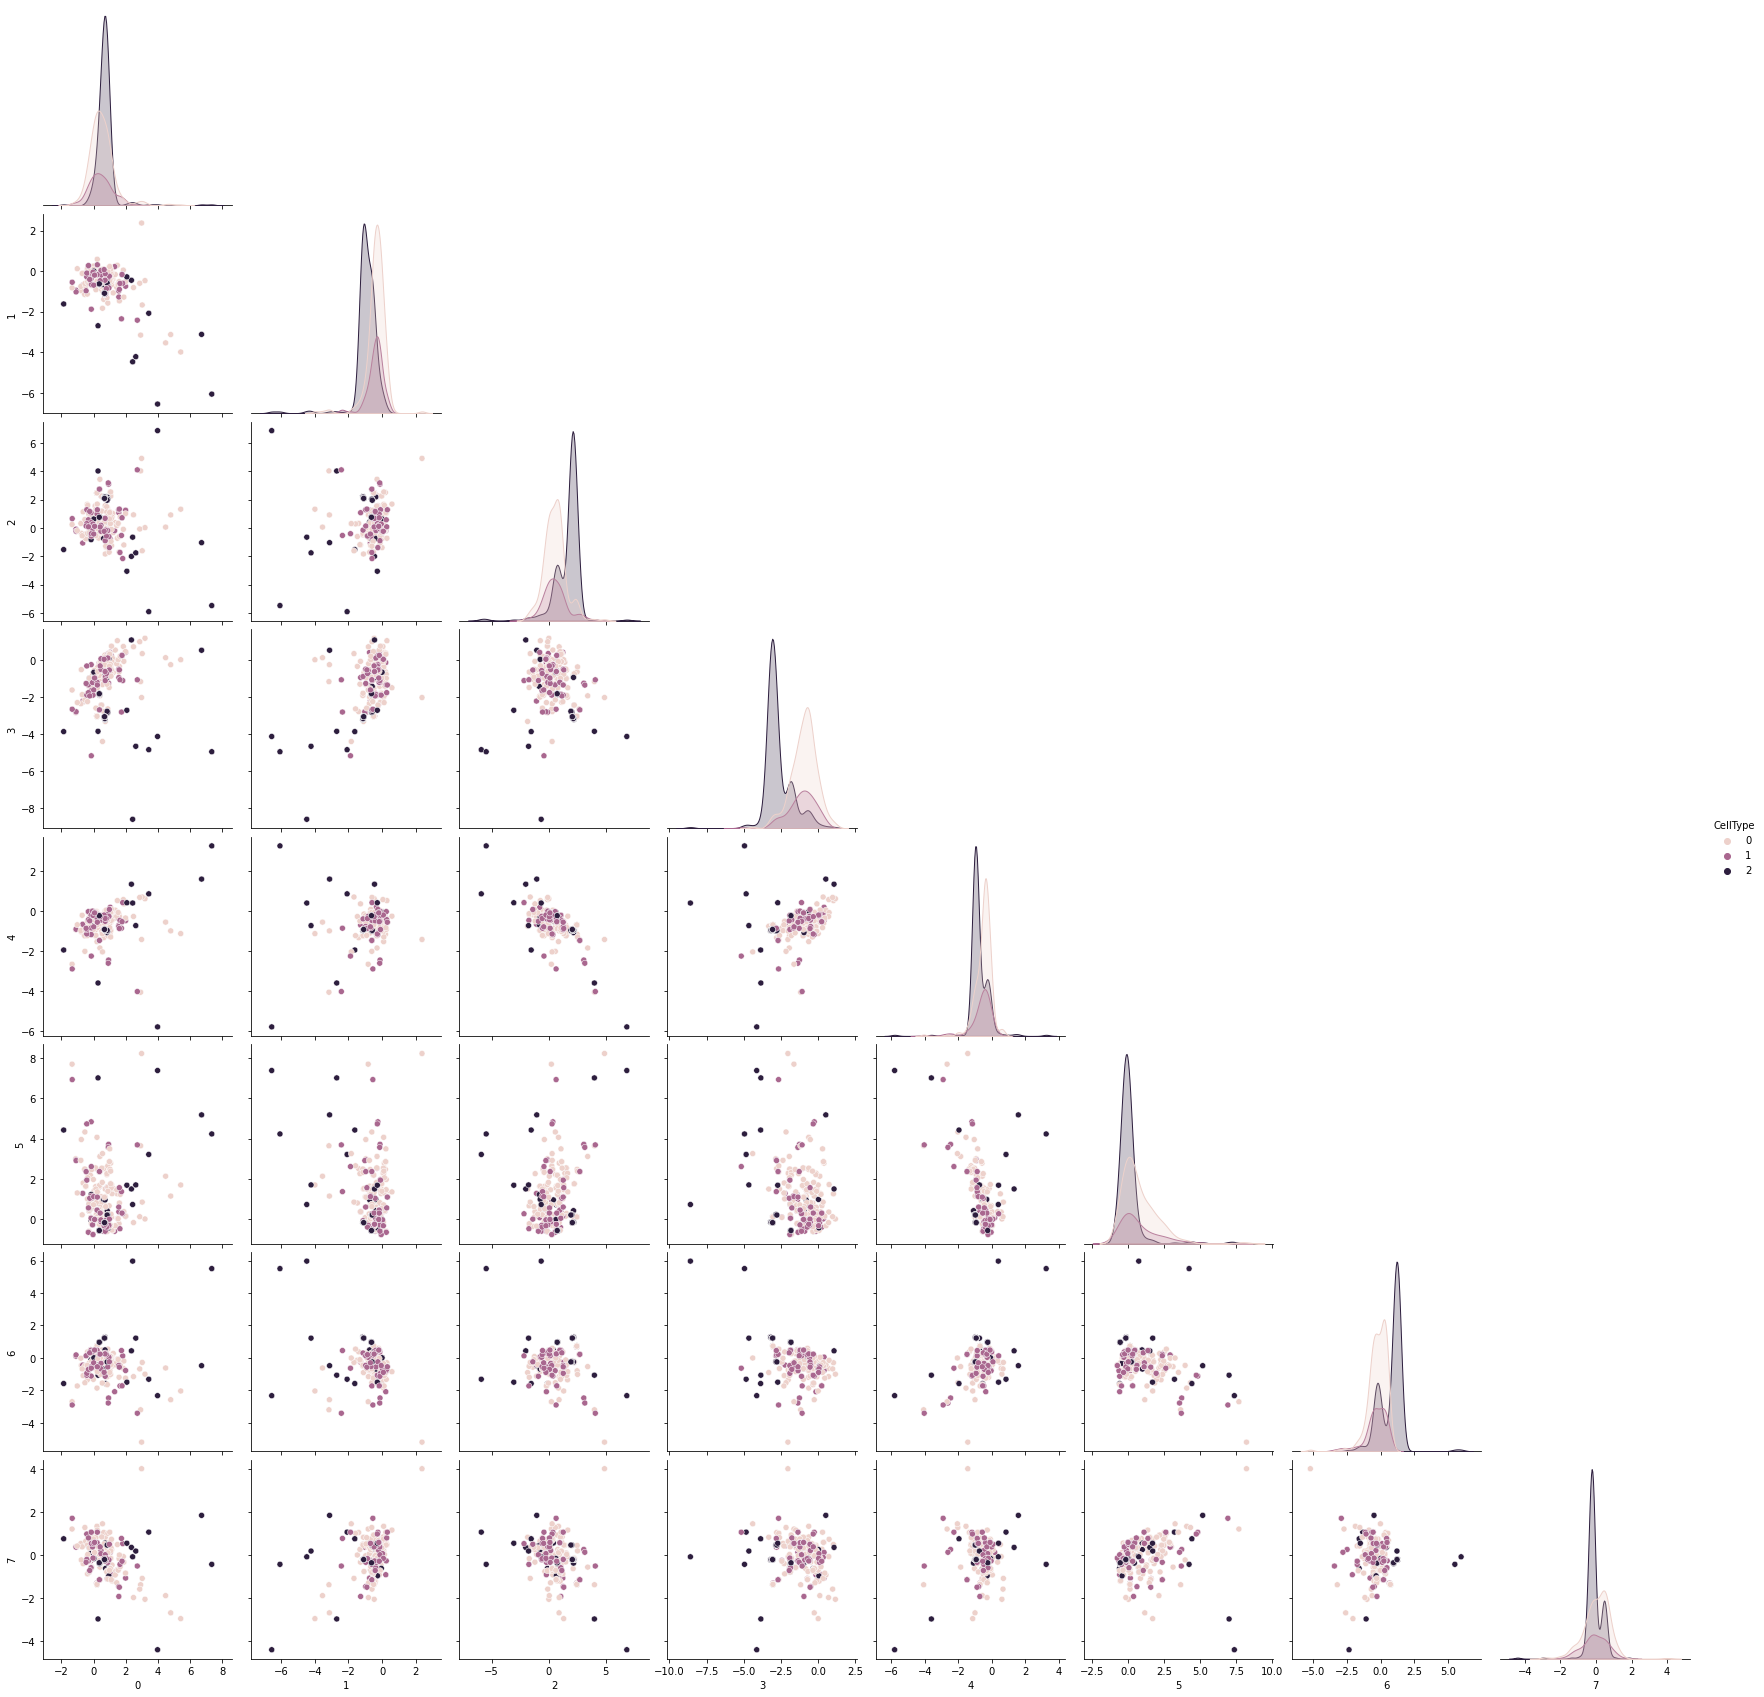

In [39]:
view_latent_variable_clusters(img_data,CAE_labels,cell_types,encoder,pairplot_height=3,PCA_flag='no',
    PCA_figwidth=8)  